# Изучение закономерностей, определяющих успешность игр.

## План проекта
1.[Открыть файл с данными](#cell1)

2.[Предобработка данных](#cell2)

3.[Исследовательский анализ данных](#cell3)

4.[Портрет пользователя каждого региона](#cell4)

5.[Проверка гипотез](#cell5)

6.[Общий вывод](#cell6)

### Открыть файл с данными.
<a id='cell1'></a>

1. Импортировал библиотеку pandas, matplotlib.pyplot.

In [42]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

2. Открыл файл /datasets/games.csv и сохранил его в переменной game_df.

In [43]:
game_df = pd.read_csv('/datasets/games.csv')

3.Ознакомился со сводной информацией в таблице, вызвав метод info(), head(), describe().

In [44]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [45]:
game_df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN


In [46]:
pd.set_option('display.float_format', '{:,.2f}'.format)
game_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,16713,11559,Need for Speed: Most Wanted,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Platform,16715,31,PS2,2161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year_of_Release,"16,446.00",NaN,NaN,NaN,"2,006.48",5.88,"1,980.00","2,003.00","2,007.00","2,010.00","2,016.00"
Genre,16713,12,Action,3369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NA_sales,"16,715.00",NaN,NaN,NaN,0.26,0.81,0.00,0.00,0.08,0.24,41.36
EU_sales,"16,715.00",NaN,NaN,NaN,0.15,0.50,0.00,0.00,0.02,0.11,28.96
JP_sales,"16,715.00",NaN,NaN,NaN,0.08,0.31,0.00,0.00,0.00,0.04,10.22
Other_sales,"16,715.00",NaN,NaN,NaN,0.05,0.19,0.00,0.00,0.01,0.03,10.57
Critic_Score,"8,137.00",NaN,NaN,NaN,68.97,13.94,13.00,60.00,71.00,79.00,98.00
User_Score,10014,96,tbd,2424,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Предобработка данных.
<a id='cell2'></a>

1. Привел название столбцов к нижнему регистру.

In [47]:
game_df.set_axis(['name','platform','year_of_release','genre','na_sales','eu_sales','jp_sales','other_sales','critic_score', 'user_score', 'rating'],axis = 'columns',inplace = True);

In [48]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


* Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему.

1. Поменял тип данных в столбце 'year_of_release' на 'int'. Предварительно заменил пропуски на 0. Проверил пустые пустые значения датафрейма методом isnull().

In [49]:
game_df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

1. В столбце 'year_of_release' 269 строк с пустыми значения это 1,6% от общего числа строк. Замена строк с пустыми значениями на 0 не сильно повлияет на результаты дальнейших исследований.

In [50]:
game_df['year_of_release'] = game_df['year_of_release'].fillna(0)
game_df['year_of_release'] = game_df['year_of_release'].astype('int')

2. Заменил пропуски в столбцах 'critic_score', 'user_score' на средние значения в зависимости от жанра т.к пропусков в столбцах 'critic_score' и 'user_score' более 50 %. tbd - to be determined - 'будет определено', раз рейтинг еще не выставлен заменим значение tbd на 0.

* Произвел подсчет среднего значения оценки критиков и пользователей в зависимости от жанра применяя groupby() и mean().

In [51]:
game_df['user_score'] = game_df['user_score'].replace('tbd', 0)
game_df['user_score'] = game_df['user_score'].astype('float64')
critic_score_mean = game_df.groupby('genre')['critic_score'].mean()
user_score_mean = game_df.groupby('genre')['user_score'].mean()

* При помощи merge подсоединил датасет с средними значениями к основному датасету. В итоге в каждой строчке должно появиться среднее значение, которое можно использовать при замене пустых значений.

In [52]:
game_df1 = game_df.merge(critic_score_mean, on='genre', how='left')
game_df2 = game_df1.merge(user_score_mean, on='genre', how='left')

* Произвел замену пропущенных значений в столбцах 'critic_score_x', 'user_score_x' на средние значения в зависимости от жанра методом fillna().

In [53]:
game_df2['critic_score_x'] = game_df2['critic_score_x'].fillna(game_df2.loc[:,'critic_score_y'])
game_df2['user_score_x'] = game_df2['user_score_x'].fillna(game_df2.loc[:,'user_score_y'])
game_df2.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score_x,user_score_x,rating,critic_score_y,user_score_y
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,71.97,5.06
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.06,5.51,NaN,68.06,5.51
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,67.96,5.16
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,71.97,5.06
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,72.65,7.32,NaN,72.65,7.32


* Удаляю столбцы 'critic_score_y', 'user_score_y', чтобы облегчить датафрейм.

In [54]:
game_df2.drop(columns = ['critic_score_y', 'user_score_y'], axis=1, inplace=True )
game_df2.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score_x,user_score_x,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.06,5.51,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,72.65,7.32,NaN


* Так как столбец 'rating' имеет буквенные обозначения, то пропуски заменю на 'WR', что будет обозначать without rating.

In [55]:
game_df['rating'] = game_df['rating'].fillna('WR')
game_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,nan,nan,WR
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,nan,nan,WR


* Посчитал суммарные продажи во всех регионах и записал их в отдельный столбец.

In [56]:
game_df['total_sales'] = game_df['na_sales'] + game_df['eu_sales'] + game_df['jp_sales']
game_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,nan,nan,WR,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,nan,nan,WR,30.38


### Исследовательский анализ данных.
<a id='cell3'></a>

* Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

1. Построил гистограмму релизов игр в разные года.

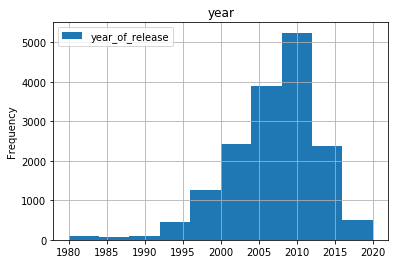

In [57]:
game_df.plot(y='year_of_release',title='year', grid=True, kind='hist', bins=10, range=(1980, 2020))
plt.show()

In [58]:
print(game_df['year_of_release'].value_counts())

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
0        269
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64


* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

2. График по подажам разных платформам в Северной Америке.

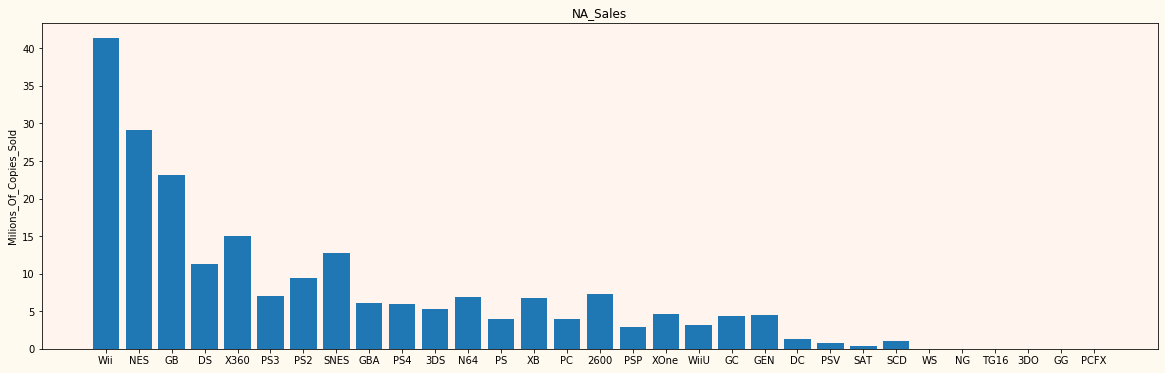

In [59]:
x = game_df['platform']
y = game_df['na_sales']

fig, ax_na = plt.subplots()

ax_na.bar(x, y)

ax_na.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(20)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure

ax_na.set_ylabel('Milions_Of_Copies_Sold')
ax_na.set_title('NA_Sales')

plt.show()

3. Построил график по продажам разных платформ в Европе.

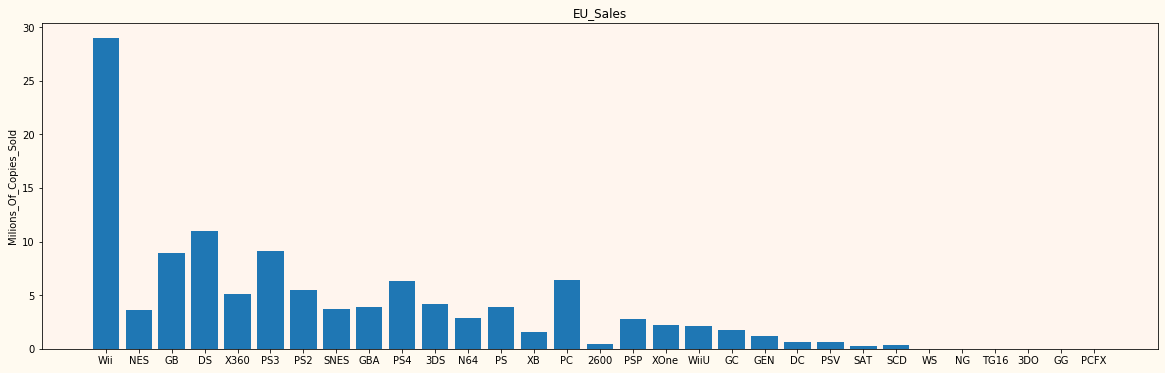

In [60]:
x = game_df['platform']
y = game_df['eu_sales']

fig, ax_eu = plt.subplots()

ax_eu.bar(x, y)

ax_eu.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(20)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure

ax_eu.set_ylabel('Milions_Of_Copies_Sold')
ax_eu.set_title('EU_Sales')

plt.show()

4. Построил график по продажам разных платформ в Японии.

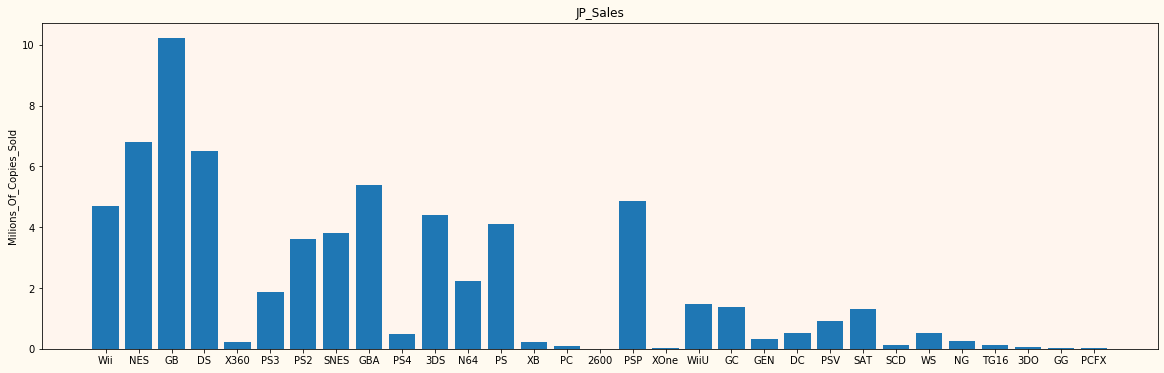

In [61]:
x = game_df['platform']
y = game_df['jp_sales']

fig, ax_jp = plt.subplots()

ax_jp.bar(x, y)

ax_jp.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(20)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure

ax_jp.set_ylabel('Milions_Of_Copies_Sold')
ax_jp.set_title('JP_Sales')

plt.show()

Вывод: Судя по графикам наибольшие продажи проходят по платформам (Wii, GB, DS, NES).

* Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам.

5. Распределение релиза игр по годам платформы Wii.

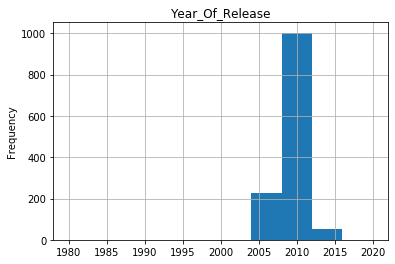

In [62]:
game_gb = game_df.loc[game_df.loc[:,'platform'] == 'Wii']['year_of_release']
game_gb.plot(y=game_gb,title='Year_Of_Release', grid=True, kind='hist', bins=10, range=(1980, 2020))
plt.show()

6. Распределение релиза игр по годам платформы GB.

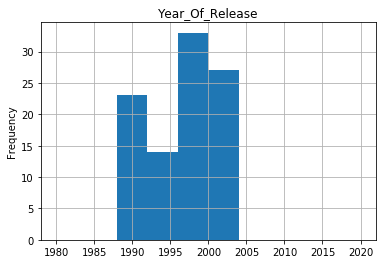

In [63]:
game_n64 = game_df.loc[game_df.loc[:,'platform'] == 'GB']['year_of_release']
game_n64.plot(y=game_n64,title='Year_Of_Release', grid=True, kind='hist', bins=10, range=(1980, 2020))
plt.show()

7.  Распределение релиза игр по годам платформы DS.

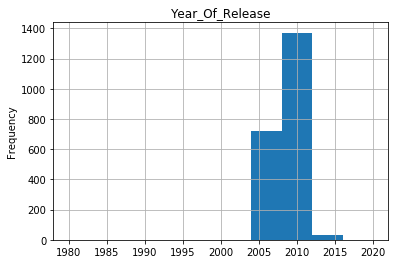

In [64]:
game_ps = game_df.loc[game_df.loc[:,'platform'] == 'DS']['year_of_release']
game_ps.plot(y=game_ps,title='Year_Of_Release', grid=True, kind='hist', bins=10, range=(1980, 2020))
plt.show()

8.  Распределение релиза игр по годам платформы NES.

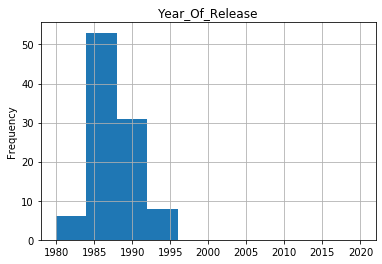

In [65]:
game_nes = game_df.loc[game_df.loc[:,'platform'] == 'NES']['year_of_release']
game_nes.plot(y=game_ps,title='Year_Of_Release', grid=True, kind='hist', bins=10, range=(1980, 2020))
plt.show()

8. Чтобы оценить за какой характерный срок появляются новые и исчезают старые платформы, взял для анализа платформы PS2, PS3, PS4.

* PS2.

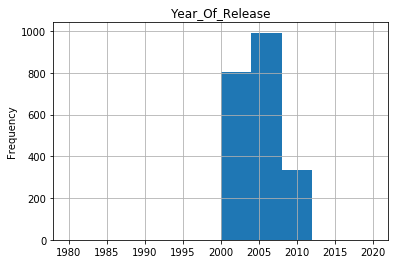

In [66]:
game_ps = game_df.loc[game_df.loc[:,'platform'] == 'PS2']['year_of_release']
game_ps.plot(y=game_ps,title='Year_Of_Release', grid=True, kind='hist', bins=10, range=(1980, 2020))
plt.show()

* PS3.

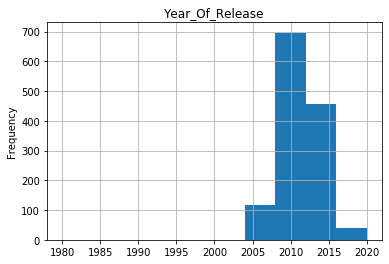

In [67]:
game_ps = game_df.loc[game_df.loc[:,'platform'] == 'PS3']['year_of_release']
game_ps.plot(y=game_ps,title='Year_Of_Release', grid=True, kind='hist', bins=10, range=(1980, 2020))
plt.show()

* PS4.

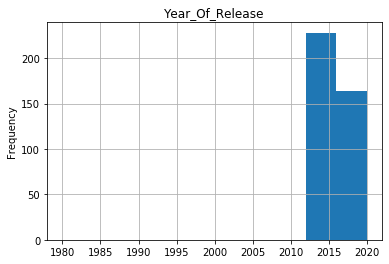

In [68]:
game_ps = game_df.loc[game_df.loc[:,'platform'] == 'PS4']['year_of_release']
game_ps.plot(y=game_ps,title='Year_Of_Release', grid=True, kind='hist', bins=10, range=(1980, 2020))
plt.show()

Вывод: характерный срок появления новых платформ 8-10 лет, судя по платформе PS.

* Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
* Не учитывайте в работе данные за предыдущие годы.
* Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

9. Данные за актуальный период в регионе NA. Чтобы сделать прогноз на 2017 год, взял данные за прошедшие 12 лет.

* Период с 2005 по 2008.

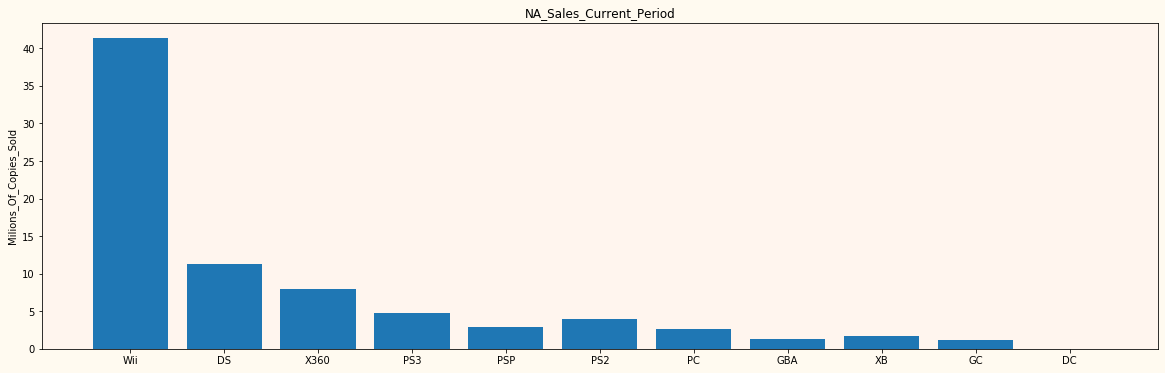

In [69]:
current_period = game_df.query('year_of_release in ("2005", "2006", "2007", "2008")')
#current_period.pivot_table(index='platform', values='na_sales').plot(grid=True,title='NA_Sales_Current_Period', figsize=(20, 12));

x = current_period['platform']
y = current_period['na_sales']

fig, ax_na_cp = plt.subplots()

ax_na_cp.bar(x, y)

ax_na_cp.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(20)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure

ax_na_cp.set_ylabel('Milions_Of_Copies_Sold')
ax_na_cp.set_title('NA_Sales_Current_Period')

plt.show()

* Период с 2009 по 2012.

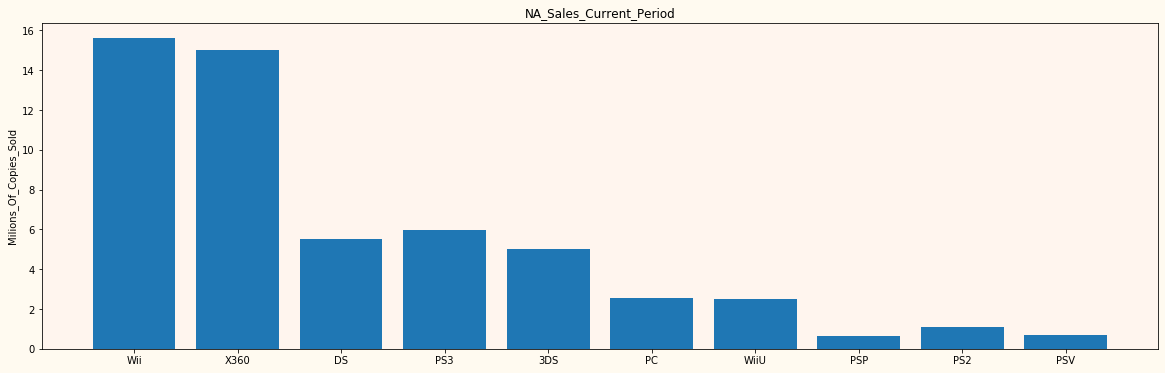

In [70]:
current_period = game_df.query('year_of_release in ("2009", "2010", "2011", "2012")')
#current_period.pivot_table(index='platform', values='na_sales').plot(grid=True,title='NA_Sales_Current_Period', figsize=(20, 12));

x = current_period['platform']
y = current_period['na_sales']

fig, ax_na_cp = plt.subplots()

ax_na_cp.bar(x, y)

ax_na_cp.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(20)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure

ax_na_cp.set_ylabel('Milions_Of_Copies_Sold')
ax_na_cp.set_title('NA_Sales_Current_Period')

plt.show()

* Период с 2013 по 2016.

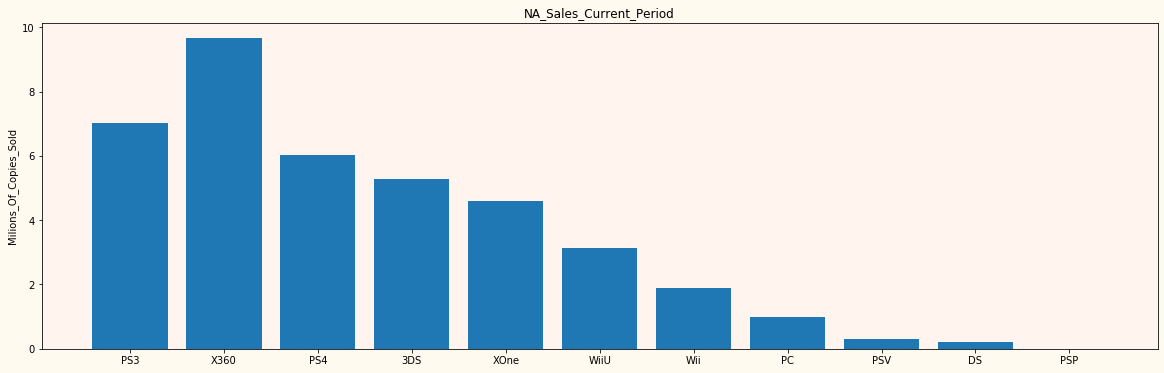

In [71]:
current_period = game_df.query('year_of_release in ("2013", "2014", "2015", "2016")')
#current_period.pivot_table(index='platform', values='na_sales').plot(grid=True,title='NA_Sales_Current_Period', figsize=(20, 12));

x = current_period['platform']
y = current_period['na_sales']

fig, ax_na_cp = plt.subplots()

ax_na_cp.bar(x, y)

ax_na_cp.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(20)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure

ax_na_cp.set_ylabel('Milions_Of_Copies_Sold')
ax_na_cp.set_title('NA_Sales_Current_Period')

plt.show()

Вывод: Выделю потенциально прибыльные платформы PS4, XOne т.к в период 2013г-2016г предшествующий 2017г эти платформы набирают обороты, потому что недавно вышли на рынок. Им предшествовали платформы PS3 и X360 по графикам виден их рост за выбранные периоды.

10. График «ящик с усами» по глобальным продажам игр в разбивке по платформам в регионе NA. Выбрал топ 4 платформы по продажам в Северной Америке.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


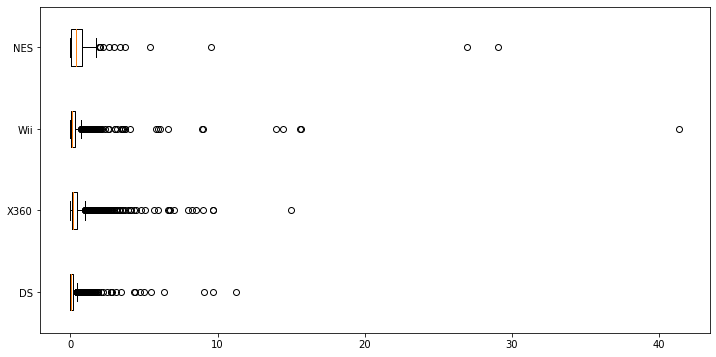

In [72]:
DS = game_df.loc[game_df.loc[:,'platform'] == 'DS']['na_sales']
X360 = game_df.loc[game_df.loc[:,'platform'] == 'X360']['na_sales']
Wii = game_df.loc[game_df.loc[:,'platform'] == 'Wii']['na_sales']
NES = game_df.loc[game_df.loc[:,'platform'] == 'NES']['na_sales']


labels = ['DS', 'X360', 'Wii', 'NES']
plt.figure(figsize=(12,6));
plt.boxplot([DS,X360,Wii,NES], labels=labels, vert=False);
plt.show();

* Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
* Соотнесите выводы с продажами игр на других платформах.
* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

11. Построил диаграмму рассеяния между продажами и отзывами критиков, пользователей. Исследуется регион NA, EU, JP. Выделил платформу PS3 и для сравнения выделил платформу X360 и XOne.

* PS3

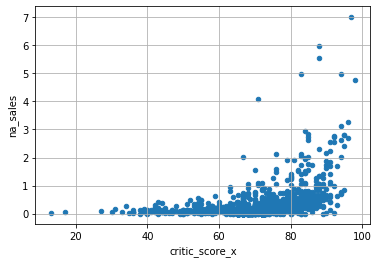

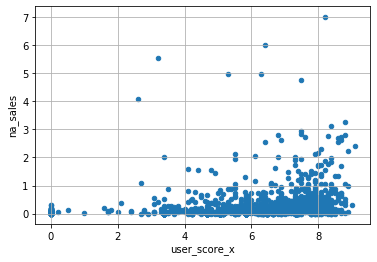

In [73]:
ps3_corr = game_df2.query('platform in ("PS3")')
ps3_corr.plot(x='critic_score_x', y='na_sales', grid=True, kind='scatter');
ps3_corr.plot(x='user_score_x', y='na_sales', grid=True, kind='scatter');

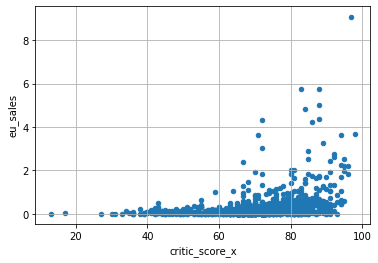

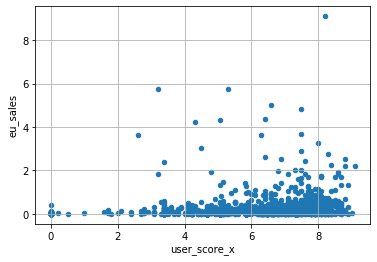

In [74]:
ps3_corr.plot(x='critic_score_x', y='eu_sales', grid=True, kind='scatter');
ps3_corr.plot(x='user_score_x', y='eu_sales', grid=True, kind='scatter');

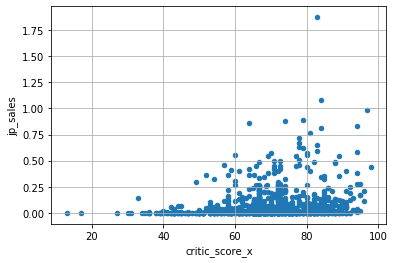

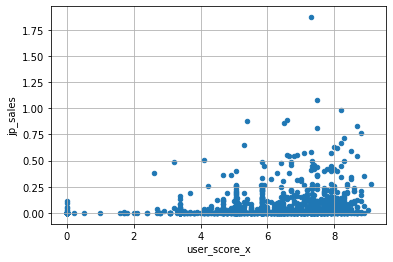

In [75]:
ps3_corr.plot(x='critic_score_x', y='jp_sales', grid=True, kind='scatter');
ps3_corr.plot(x='user_score_x', y='jp_sales', grid=True, kind='scatter');

Вывод: Чем выше оценка пользователей, критиков тем выше продажи. В Северной Америке и Японии наблюдаются игры с низкой или средней оценкой пользователей, но имеющие высокие показатели по продажам, в этих случаях оценка пользователей не повлияла на продажи игр платформы PS3.

* X360

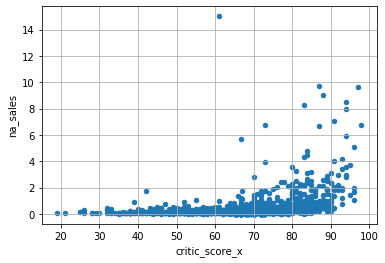

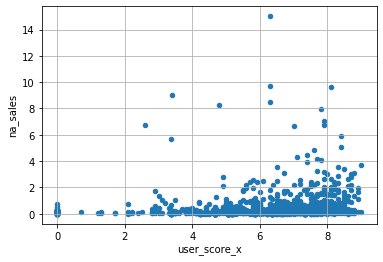

In [76]:
x360_corr = game_df2.query('platform in ("X360")')
x360_corr.plot(x='critic_score_x', y='na_sales',grid=True, kind='scatter');
x360_corr.plot(x='user_score_x', y='na_sales',grid=True, kind='scatter');

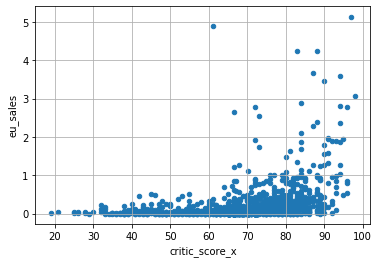

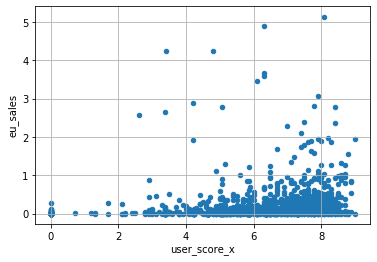

In [77]:
x360_corr.plot(x='critic_score_x', y='eu_sales',grid=True, kind='scatter');
x360_corr.plot(x='user_score_x', y='eu_sales',grid=True, kind='scatter');

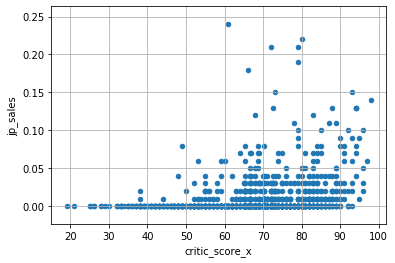

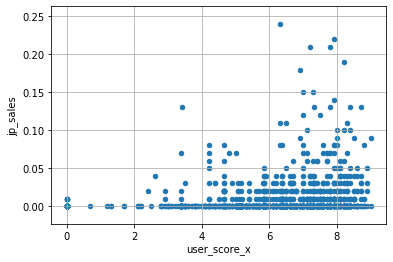

In [78]:
x360_corr.plot(x='critic_score_x', y='jp_sales', grid=True, kind='scatter');
x360_corr.plot(x='user_score_x', y='jp_sales', grid=True, kind='scatter');

Вывод: Для платформы Х360 игры с высокими оценками критиков и пользователей имеют высокие показатели по продажам, имеются выбивающиеся показатели вне зависимости от оценки пользователей и критиков т.е оценка может быть не высокой, но продажи тем не менее высокие, т.е игры которые у пользователей завоевали популярность не взирая на оценку критиков.

* XOne

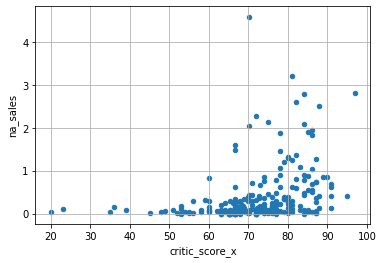

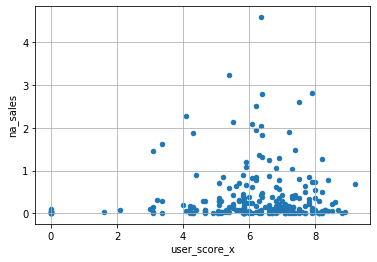

In [79]:
xone_corr = game_df2.query('platform in ("XOne")')
xone_corr.plot(x='critic_score_x', y='na_sales', grid=True, kind='scatter');
xone_corr.plot(x='user_score_x', y='na_sales', grid=True, kind='scatter');

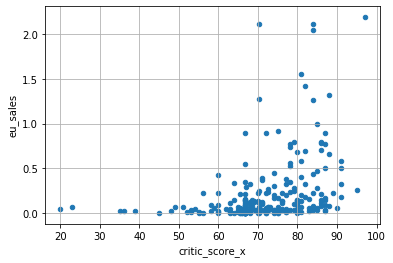

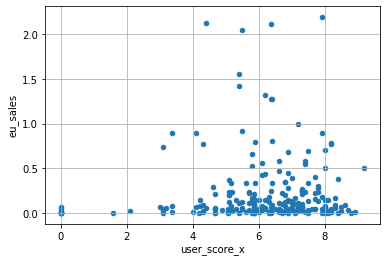

In [80]:
xone_corr.plot(x='critic_score_x', y='eu_sales', grid=True, kind='scatter');
xone_corr.plot(x='user_score_x', y='eu_sales', grid=True, kind='scatter');

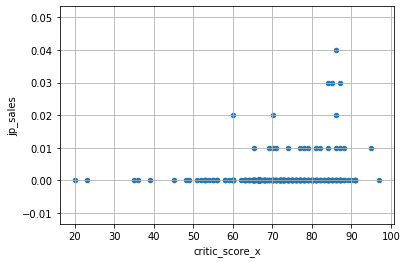

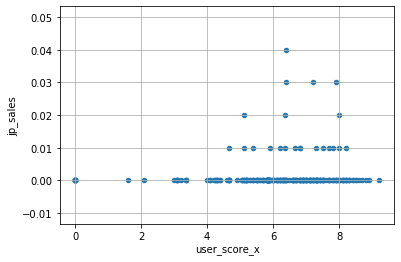

In [81]:
xone_corr.plot(x='critic_score_x', y='jp_sales', grid=True, kind='scatter');
xone_corr.plot(x='user_score_x', y='jp_sales', grid=True, kind='scatter');

Вывод: Платформа XOne в Японии явно не самая популярная. Наблюдается похожая картина, как и с предыдущими платформами, рост продаж с ростом оценок критиков, пользователей, но и также выбивающиеся показатели с невысокими оценками, но высокими продажами.

12. Корреляция между продажами и оценкой пользователей, критиков. Исследуется регион NA, EU, JP.

In [82]:
print(ps3_corr['critic_score_x'].corr(ps3_corr['na_sales']))
print(ps3_corr['user_score_x'].corr(ps3_corr['na_sales']))

0.44408918284833376
0.22104037429574602


In [83]:
print(ps3_corr['critic_score_x'].corr(ps3_corr['eu_sales']))
print(ps3_corr['user_score_x'].corr(ps3_corr['eu_sales']))

0.36562530193070464
0.16139907526192973


In [84]:
print(ps3_corr['critic_score_x'].corr(ps3_corr['jp_sales']))
print(ps3_corr['user_score_x'].corr(ps3_corr['jp_sales']))

0.19936483589686493
0.20339244114618585


Вывод: Линейная зависимость между продажами и оценкой критиков, пользователей не сильная, особенно в Японии. Для платформ PS3, Х360, XOne по все регионам игры с высокими оценками критиков и пользователей имеют высокие показатели по продажам, имеются выбивающиеся показатели вне зависимости от оценки пользователей и критиков т.е оценка может быть невысокой, но продажи тем не менее высокие, т.е игры которые у пользователей завоевали популярность не взирая на оценку критиков.

12. Распределение продаж по жанрам в Северной Америке, Японии, Европе.

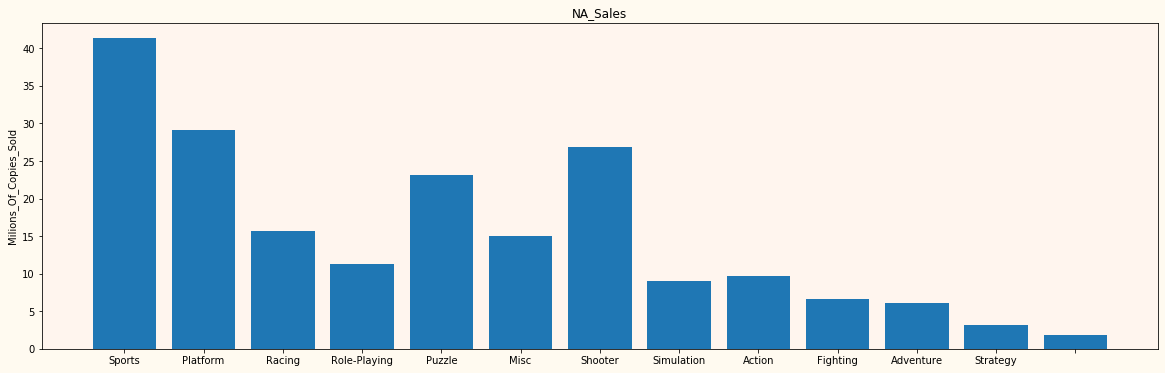

In [85]:
game_df['genre'] = game_df['genre'].fillna('')

x = game_df['genre']
y = game_df['na_sales']

fig, ax_nag = plt.subplots()

ax_nag.bar(x, y)

ax_nag.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(20)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure

ax_nag.set_ylabel('Milions_Of_Copies_Sold')
ax_nag.set_title('NA_Sales')

plt.show()

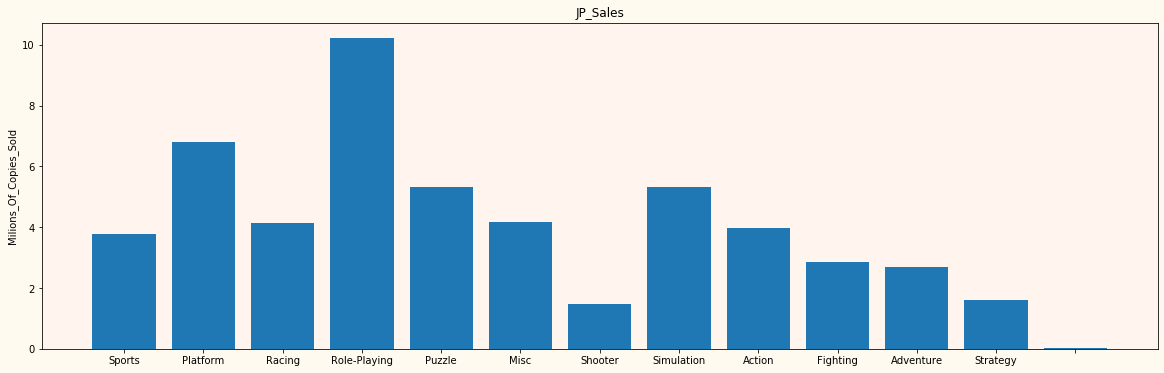

In [86]:
x = game_df['genre']
y = game_df['jp_sales']

fig, ax_jpg = plt.subplots()

ax_jpg.bar(x, y)

ax_jpg.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(20)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure

ax_jpg.set_ylabel('Milions_Of_Copies_Sold')
ax_jpg.set_title('JP_Sales')

plt.show()

In [ ]:
x = game_df['genre']
y = game_df['eu_sales']

fig, ax_eug = plt.subplots()

ax_eug.bar(x, y)

ax_eug.set_facecolor('seashell')
fig.set_facecolor('floralwhite')
fig.set_figwidth(20)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure

ax_eug.set_ylabel('Milions_Of_Copies_Sold')
ax_eug.set_title('EU_Sales')

plt.show()

Вывод: В Северной Америке и Европе лидирующие позиции занимает жанр Sports в аутсайдере Strategy, в Японии лидирует жанр Role_PLaying, аутсайдер Shooter. Вообще продажи по жанрам в разных регионах разнятся, особенно выделяется Япония, что видно по графикам.

### Портрет пользователя каждого региона.
<a id='cell4'></a>

Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

1. Топ 5 платформ в JP,NA,EU доля продаж и топ 5 самых популярных жанров.

Доля продаж топ 5 платформ в JP. Топ популярных жанров.

In [ ]:
platform_jp = game_df.groupby('platform')['jp_sales'].value_counts().sort_values(ascending=False)
print(platform_jp)

In [ ]:
genre_jp = game_df.groupby('genre')['jp_sales'].value_counts().sort_values(ascending=False)
print(genre_jp)

In [ ]:
jp_sales_total = game_df['jp_sales'].sum()

jp_sales_ds = game_df.loc[game_df.loc[:,'platform'] == 'DS']['jp_sales'].sum()
jp_sales_ps2 = game_df.loc[game_df.loc[:,'platform'] == 'PS2']['jp_sales'].sum()
jp_sales_wii = game_df.loc[game_df.loc[:,'platform'] == 'Wii']['jp_sales'].sum()
jp_sales_pc = game_df.loc[game_df.loc[:,'platform'] == 'PC']['jp_sales'].sum()
jp_sales_x360 = game_df.loc[game_df.loc[:,'platform'] == 'X360']['jp_sales'].sum()

ratio_ds = jp_sales_ds / jp_sales_total
ratio_ps2 = jp_sales_ps2 / jp_sales_total
ratio_wii = jp_sales_wii / jp_sales_total
ratio_pc = jp_sales_pc / jp_sales_total
ratio_x360 = jp_sales_x360 / jp_sales_total

In [ ]:
print('Доля платформы DS   | Доля платформы PS2 | Доля платформы Wii   | Доля платформы PC     | Доля платформы X360')
print('-------------------------------------------------------------------------------------------------------------')



print('{: <19.2%} | {: >18.2%} | {: >20.2%} | {: >22.2%}| {: >10.2%}'.format(ratio_ds, ratio_ps2, ratio_wii, ratio_pc, ratio_x360))


Самые популярные платформы в JP по количеству продаж DS, PS2, Wii, PC, X360. Самые популярные жанры Action, Sports, Misc, Racing, Shooter .

Доля продаж топ 5 платформ в NA. Топ популярных жанров.

In [ ]:
platform_na = game_df.groupby('platform')['na_sales'].value_counts().sort_values(ascending=False)
print(platform_na)

In [ ]:
genre_na = game_df.groupby('genre')['na_sales'].value_counts().sort_values(ascending=False)
print(genre_na)

In [ ]:
na_sales_total = game_df['na_sales'].sum()

na_sales_ds = game_df.loc[game_df.loc[:,'platform'] == 'DS']['na_sales'].sum()
na_sales_psp = game_df.loc[game_df.loc[:,'platform'] == 'PSP']['na_sales'].sum()
na_sales_pc = game_df.loc[game_df.loc[:,'platform'] == 'PC']['na_sales'].sum()
na_sales_ps2 = game_df.loc[game_df.loc[:,'platform'] == 'PS2']['na_sales'].sum()
na_sales_ps3 = game_df.loc[game_df.loc[:,'platform'] == 'PS3']['na_sales'].sum()

ratio_ds_na = na_sales_ds / na_sales_total
ratio_psp = na_sales_psp / na_sales_total
ratio_pc = na_sales_pc / na_sales_total
ratio_ps2 = na_sales_ps2 / na_sales_total
ratio_ps3 = na_sales_ps3 / na_sales_total

In [ ]:
print('Доля платформы DS   | Доля платформы PSP | Доля платформы PC   | Доля платформы PS2     | Доля платформы PS3')
print('-------------------------------------------------------------------------------------------------------------')



print('{: <19.2%} | {: >18.2%} | {: >19.2%} | {: >23.2%}| {: >10.2%}'.format(ratio_ds_na, ratio_psp, ratio_pc, ratio_ps2, ratio_ps3))


Самые популярные платформы в NA по количеству продаж DS, PSP, PC, PS2, PS3. Самые популярные жанры Action, Adventure, Role-Playing, Misc, Sports.       

Доля продаж топ 5 платформ в EU. Топ популярных жанров.

In [ ]:
platform_eu = game_df.groupby('platform')['eu_sales'].value_counts().sort_values(ascending=False)
print(platform_eu)

In [ ]:
genre_eu = game_df.groupby('genre')['eu_sales'].value_counts().sort_values(ascending=False)
print(genre_eu)

In [ ]:
eu_sales_total = game_df['eu_sales'].sum()

eu_sales_ds = game_df.loc[game_df.loc[:,'platform'] == 'DS']['eu_sales'].sum()
eu_sales_psp = game_df.loc[game_df.loc[:,'platform'] == 'PSP']['eu_sales'].sum()
eu_sales_pc = game_df.loc[game_df.loc[:,'platform'] == 'PC']['eu_sales'].sum()
eu_sales_ps2 = game_df.loc[game_df.loc[:,'platform'] == 'PS2']['eu_sales'].sum()
eu_sales_ps3 = game_df.loc[game_df.loc[:,'platform'] == 'PS3']['eu_sales'].sum()

ratio_ds_eu = eu_sales_ds / eu_sales_total
ratio_psp_eu = eu_sales_psp / eu_sales_total
ratio_pc_eu = eu_sales_pc / eu_sales_total
ratio_ps2_eu = eu_sales_ps2 / eu_sales_total
ratio_ps3_eu = eu_sales_ps3 / eu_sales_total

In [ ]:
print('Доля платформы DS   | Доля платформы PSP | Доля платформы PC   | Доля платформы PS2     | Доля платформы PS3')
print('-------------------------------------------------------------------------------------------------------------')



print('{: <19.2%} | {: >18.2%} | {: >19.2%} | {: >23.2%}| {: >10.2%}'.format(ratio_ds_eu, ratio_psp_eu, ratio_pc_eu, ratio_ps2_eu, ratio_ps3_eu))


Самые популярные платформы в EU по количеству продаж DS, PSP, PC, PS2, PS3. Самые популярные жанры Action, Adventure, Misc, Sports, Role-Playing.

* Влияние рейтинга ESRB на продажи в регионе NA.

In [ ]:
game_df.pivot_table(index='rating', values='na_sales').plot(grid=True,title='NA_Sales_ESRB', figsize=(20, 10));
plt.show()

Вывод: Самые популярные платформы в EU по количеству продаж DS, PSP, Wii, PS2, PS3. Самые популярные жанры Action, Adventure, Misc, Sport, Role-Playing.

### Проверка гипотез.
<a id='cell5'></a>

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применл метод scipy.stats.ttest_ind (array1, array2, equal_var)

In [ ]:
#H0 - Средние пользовательские рейтинги платформ Xbox One и PC не различаются.
#H1 - Средние пользовательские рейтинги платформ Xbox One и PC различаются.

df_xbox_one = game_df2.loc[game_df.loc[:,'platform'] == 'XOne']['user_score_x']
df_pc = game_df2.loc[game_df.loc[:,'platform'] == 'PC']['user_score_x']


alpha = 0.05 # критический уровень статистической значимости
 
results = st.ttest_ind(df_xbox_one, df_pc, equal_var = False)
 
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print(" Отвергаем нулевую гипотезу, cредние пользовательские рейтинги платформ Xbox One и PC различаются.")
else:
    print("Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги платформ Xbox One и PC не различается .")

2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.  Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применл метод scipy.stats.ttest_ind (array1, array2, equal_var)

In [ ]:
#H0 - Средние пользовательские рейтинги жанров Action и Sports не различаются.
#H1 - Средние пользовательские рейтинги жанров Action и Sports различаются.

df_action = game_df2.loc[game_df.loc[:,'genre'] == 'Action']['user_score_x']
df_sports = game_df2.loc[game_df.loc[:,'genre'] == 'Sports']['user_score_x']


alpha = 0.05 # критический уровень статистической значимости
 
results = st.ttest_ind(df_action, df_sports, equal_var = False)
 
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print(" Отвергаем нулевую гипотезу, cредние пользовательские рейтинги жанров Action и Sports различаются.")
else:
    print("Не получилось отвергнуть нулевую гипотезу, cредние пользовательские рейтинги жанров Action и Sports не различается .")

### Общий вывод.
<a id='cell6'></a>

Самая большая суммарная продажа ,по всем платформам и жанрам игр, в Северной Америке. Чем выше оценка критиков и пользователей, тем выше продажи, такая тенденция наблюдается во всех регионах. Топовые платформы по регионам различаются, например в Северной Америике это DS, PSP, PC, PS2, PS3, а в Японии - DS, PS2, Wii, PC, X360. Тоже касается популярных жанров, в Северной Америке это - Action, Adventure, Role-Playing, Misc, Sports, а в Японии - Action, Sports, Misc, Racing, Shooter. Но по топовые платформы и игровые жанры схожи по регионам Северной Америки и Европы. За период 8-10 лет появляется новая платформа.